In [1]:
import math
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import distance
import main

Generate distribution of ellipses

In [2]:
## generate distribution
grid = [100, 100]
width, height = grid
m = 2       # number of starting points
N = 128     # number of all points

## Selects two random points on a grid
initial = np.array([ [random.uniform(0,1)*width, random.uniform(0,1)*height] for i in range(m) ])
## and generate distribution with Mitchell algorithm
dist = main.distribution(initial, grid, N)

In [3]:
## change circles into ellipses
a, eps = 1, math.sqrt(21)/5     # big semi-axis and eccentricity
b = a*math.sqrt(1-eps**2)       # small semi-axis
a_width, b_height = 2*a, 2*b    # small and big semi-axis for patches

new_dist = main.ellipses(dist, a, b)

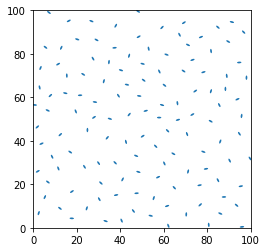

In [4]:
## generate ellipses
plt.axes()

for center in new_dist.ell:
    ellipse = main.ellipse.convert_to_patches(center, a_width, b_height)
    plt.gca().add_patch(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
# plt.savefig("elipse_512.png")
plt.show()

_____

Grow the system to rotate it

In [40]:
## start with small ellipses
a, eps = 5, math.sqrt(21)/5     # big semi-axis and eccentricity
b = a*math.sqrt(1-eps**2)       # small semi-axis
a_width, b_height = 2*a, 2*b    # small and big semi-axis for patches

new_dist.a = a
new_dist.b = b

In [41]:
## distance matrix between all the centres
S = [x.center for x in new_dist.ell]
distance_matrix = distance.cdist(S, S, dist.periodic_metric)

## matrix of neighbouring ellipses, which are less than 2*a apart
in_proximity = [np.where((line<=2*a) & (line!=0)) for line in distance_matrix]

___

In [33]:
## energy of an array of all the neighbours
def energy(point_a, proximity):
    E = 0
    if len(proximity) != 0:
        all_mu = np.array( [new_dist.mu(point_a, point_b) for point_b in proximity])
        E += np.sum(-np.log(all_mu))
    return E

In [24]:
def metropolis(neighbours, E_0, n=100, T=0):
    count, E = 0, np.zeros(shape=(n, N))
    E[0] = E_0
    for t in range(1, n):
        E[t] = E[t-1]
        ## randomly select an ellipse and copy it
        j = np.random.randint(0, N-1)
        j_ellipse = copy.deepcopy(new_dist.ell[j])

        ## generate random angle theta
        j_ellipse.angle = np.random.vonmises(j_ellipse.angle, kappa=1)

        ## decide if you want to accept new step or not
        new_E = energy(j_ellipse, new_dist.ell[neighbours[j]])
        delta_E = new_E - E[t,j]

        ## boltzmann probability distribution
        u = random.uniform(0,1)
        if (delta_E < 0 and u < 1) or (delta_E > 0 and delta_E <= T*math.log(1/u)):
            ## accept this step
            new_dist.ell[j].angle = j_ellipse.angle
            ## change energy
            E[t, j] = new_E
            count += 1
        else:
            continue
    return [E, count, n]

In [42]:
## calculate energy of starting system
E_0 = [energy(new_dist.ell[i], new_dist.ell[in_proximity[i]]) for i in range(N)]

In [43]:
E = np.zeros(shape=(100, N))
E[0] = E_0
print(E[0,40])


-2.408155230313887


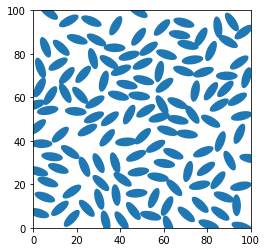

In [44]:
## generate ellipses
plt.axes()

for center in new_dist.ell:
    ellipse = main.ellipse.convert_to_patches(center, a_width, b_height)
    plt.gca().add_patch(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
# plt.savefig("elipse_512.png")
plt.show()

In [48]:
E, count, n = metropolis(in_proximity, E_0, n=10000)

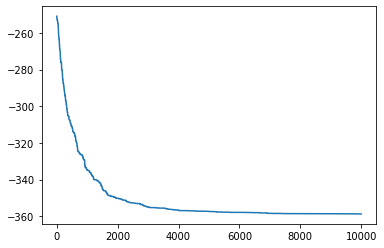

In [49]:
x = np.arange(len(E[:,0]))
y = np.sum(E, axis=1)
plt.plot(x, y)
plt.show()

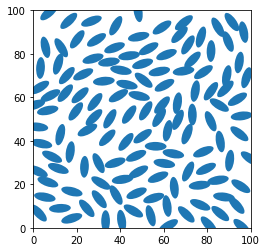

In [50]:
## generate ellipses
plt.axes()

for center in new_dist.ell:
    ellipse = main.ellipse.convert_to_patches(center, a_width, b_height)
    plt.gca().add_patch(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
# plt.savefig("elipse_512.png")
plt.show()